In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0].shape

(28, 28)

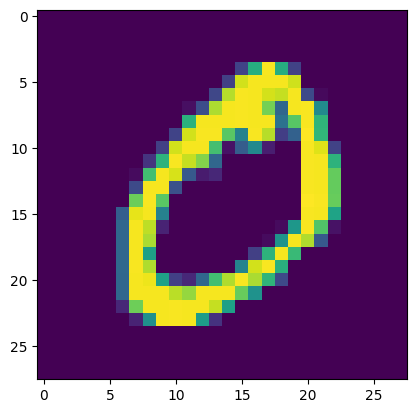

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [10]:
x_train=x_train/255
x_test=x_test/255

In [11]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [33]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0128 - val_loss: 0.0865
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0123 - val_loss: 0.1015
Epoch 3/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0098 - val_loss: 0.1099
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0084 - val_loss: 0.1063
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0069 - val_loss: 0.1081
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0082 - val_loss: 0.1154
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0062 - val_loss: 0.1147
Epoch 8/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0071 - val_loss: 0.1202
Epoch 9/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0055 - val_loss: 0.1264
Epoch 10/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.00

In [34]:
prob=model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [35]:
prob =prob.argmax(axis=1)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prob)

0.9782

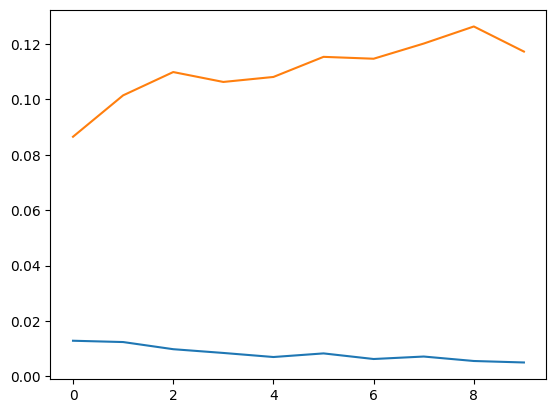

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

KeyError: 'accuracy'

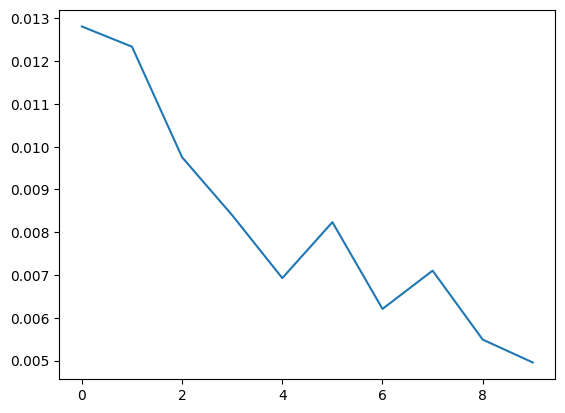

In [44]:
plt.plot(history.history['loss'])

In [47]:
model.predict(x_test[2].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 36ms/step


array([2])

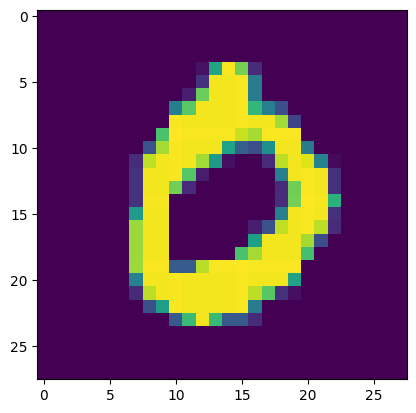

In [48]:
plt.imshow(x_test[1])